# Performance Visualisation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import sys
import os
import glob
import json

In [2]:
def get_data(prefix):
    data_map = {}
    raw_data = []
    paths = glob.glob('../benchmark_results/{}_*.json'.format(prefix))
    for path in paths:
        with open(path, 'r') as file:
            res_json = json.load(file)
            key = res_json['algorithm'].upper()
            data_map[key] = res_json['scores']
            raw_data.append(res_json)
    df = pd.DataFrame.from_dict(data_map)
    # Reorder the columns
    df = df[['NCC', 'NSC2', 'NSC3', 'NSC5', 'NN', 'PBACK', 'PMSE']]
    return df, raw_data


def plot_boxplot(prefix):
    df, raw_data = get_data(prefix)
    pca = raw_data[0]['pca']
    data_set = '{} {}'.format(
        'PCA transformed' if pca else 'original',
        raw_data[0]['data_set'].upper()
    )
    fig, ax = plt.subplots(figsize=(10, 8))
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.set_ylabel('Accuracy')
    #sns.boxplot(data=df, ax=ax, showfliers=True, showmeans=True, width=0.5)
    #sns.swarmplot(data=df, ax=ax)
    sns.violinplot(data=df, ax=ax, palette="Set1")
    fig.savefig(f'perf_{prefix}.pdf', bbox_inches='tight')
    print('Performance for the {} data set.'.format(data_set))

Performance for the original ORL data set.


/home/omar/apps/miniconda3/envs/opan/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


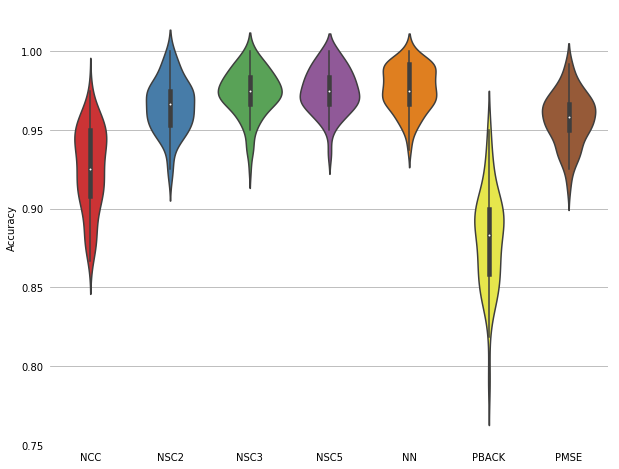

In [3]:
plot_boxplot('orl_original')

Performance for the PCA transformed ORL data set.


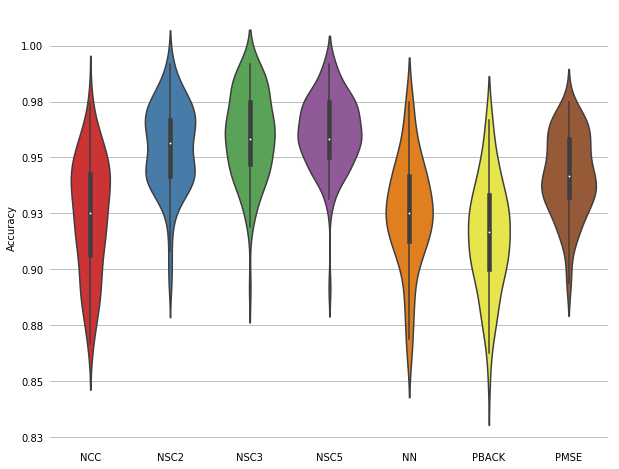

In [4]:
plot_boxplot('orl_pca54')

Performance for the PCA transformed ORL data set.


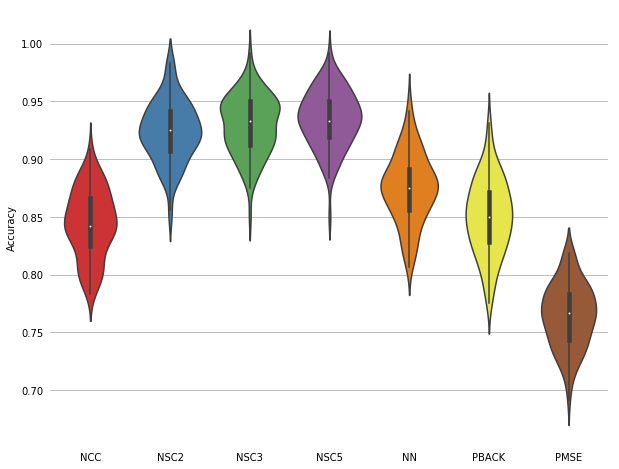

In [5]:
plot_boxplot('orl_pca13')

In [6]:
df, _ = get_data('orl_pca')

In [7]:
df.describe()

,NCC,NSC2,NSC3,NSC5,NN,PBACK,PMSE
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,0.359764,0.419697,0.402820,0.400821,0.402125,0.275589,0.157576
std,0.031575,0.034637,0.032088,0.034581,0.033179,0.030652,0.017950
min,0.293750,0.341667,0.333333,0.325000,0.325000,0.200000,0.116667
25%,0.333333,0.393750,0.381250,0.375000,0.382292,0.258333,0.143750
50%,0.358333,0.416667,0.400000,0.400000,0.400000,0.275000,0.158333
75%,0.383333,0.441667,0.425000,0.425000,0.425000,0.300000,0.166667
max,0.441667,0.525000,0.483333,0.483333,0.483333,0.333333,0.200000


Performance for the PCA transformed ORL data set.


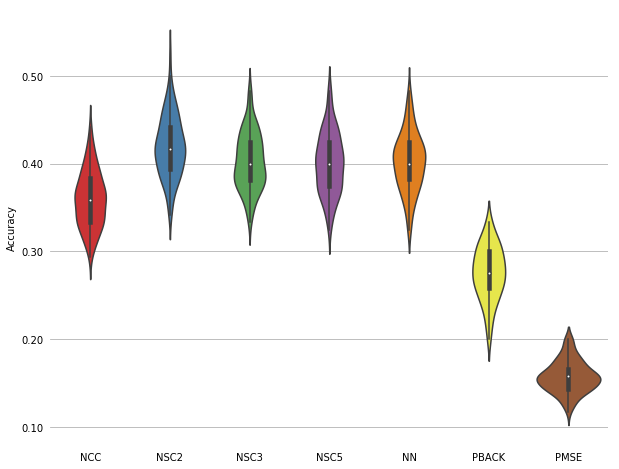

In [8]:
plot_boxplot('orl_pca')

Performance for the PCA transformed MNIST data set.


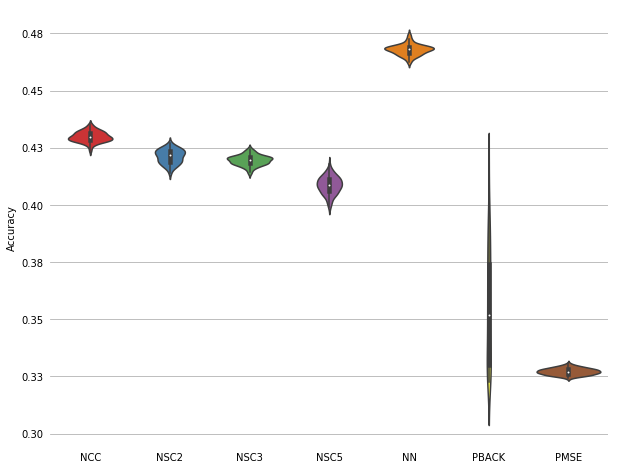

In [9]:
plot_boxplot('mnist_pca')

In [10]:
# plot_boxplot('mnist_original')